In [18]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("Master Hockey Data.csv")

In [20]:
to_drop = ['TOI/GP','S%','FOW%', "S"]
df.drop(to_drop, inplace=True, axis=1)

In [21]:
# df.head()
# need to remove index 2484 because it shows as a float and fuckes everything up
indexRemove = df[df['S/C'] == "--" ].index
df.drop(indexRemove , inplace=True)
df.drop(df.index[2484], inplace = True)

In [22]:
encoder = preprocessing.LabelEncoder()
data = df.values
values = encoder.fit_transform(data[:,1])
data[:,1] = values

In [23]:
values = encoder.fit_transform(data[:, 2])

In [24]:
data[:,2] = values

In [25]:
def myFunc(str):
    if str == "--" or type(str) == 'float':
        return "0"
    return str.replace(",","")

vFunc = np.vectorize(myFunc)
cols = [3,5,6,8,10,11,12,13,14,15]
for col in cols:
    data[:, col] = vFunc(data[:,col]).astype(float)
data[0,:]

array(['Wayne Gretzky', 0, 0, 1487.0, 894.0, 1963.0, 2857.0, 520.0, 577.0,
       1.92, 617.0, 1818.0, 204.0, 890.0, 73.0, 149.0, 2.0, 91.0],
      dtype=object)

In [26]:
my_data = pd.read_csv("Master HOF Data.csv")
hof_names = my_data["Player"].tolist()

    

In [27]:
labels = []
for i in range(np.shape(data)[0]):
    if data[i,0] in hof_names:
        labels.append(1)
    else:
        labels.append(0)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(data[:, 1:], labels , test_size=0.30)

In [29]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, pred))

Accuracy: 0.9537166900420757


In [31]:
print("Precision:", metrics.precision_score(Y_test, pred))

Precision: 0.5


In [40]:
print("Classification Report:", metrics.classification_report(Y_test, pred))
print("F1 Score: ", metrics.f1_score(Y_test, pred))
print("Hamming Loss: ", metrics.hamming_loss(Y_test, pred))

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1360
           1       0.50      0.55      0.52        66

    accuracy                           0.95      1426
   macro avg       0.74      0.76      0.75      1426
weighted avg       0.96      0.95      0.95      1426

F1 Score:  0.5217391304347826
Hamming Loss:  0.04628330995792426


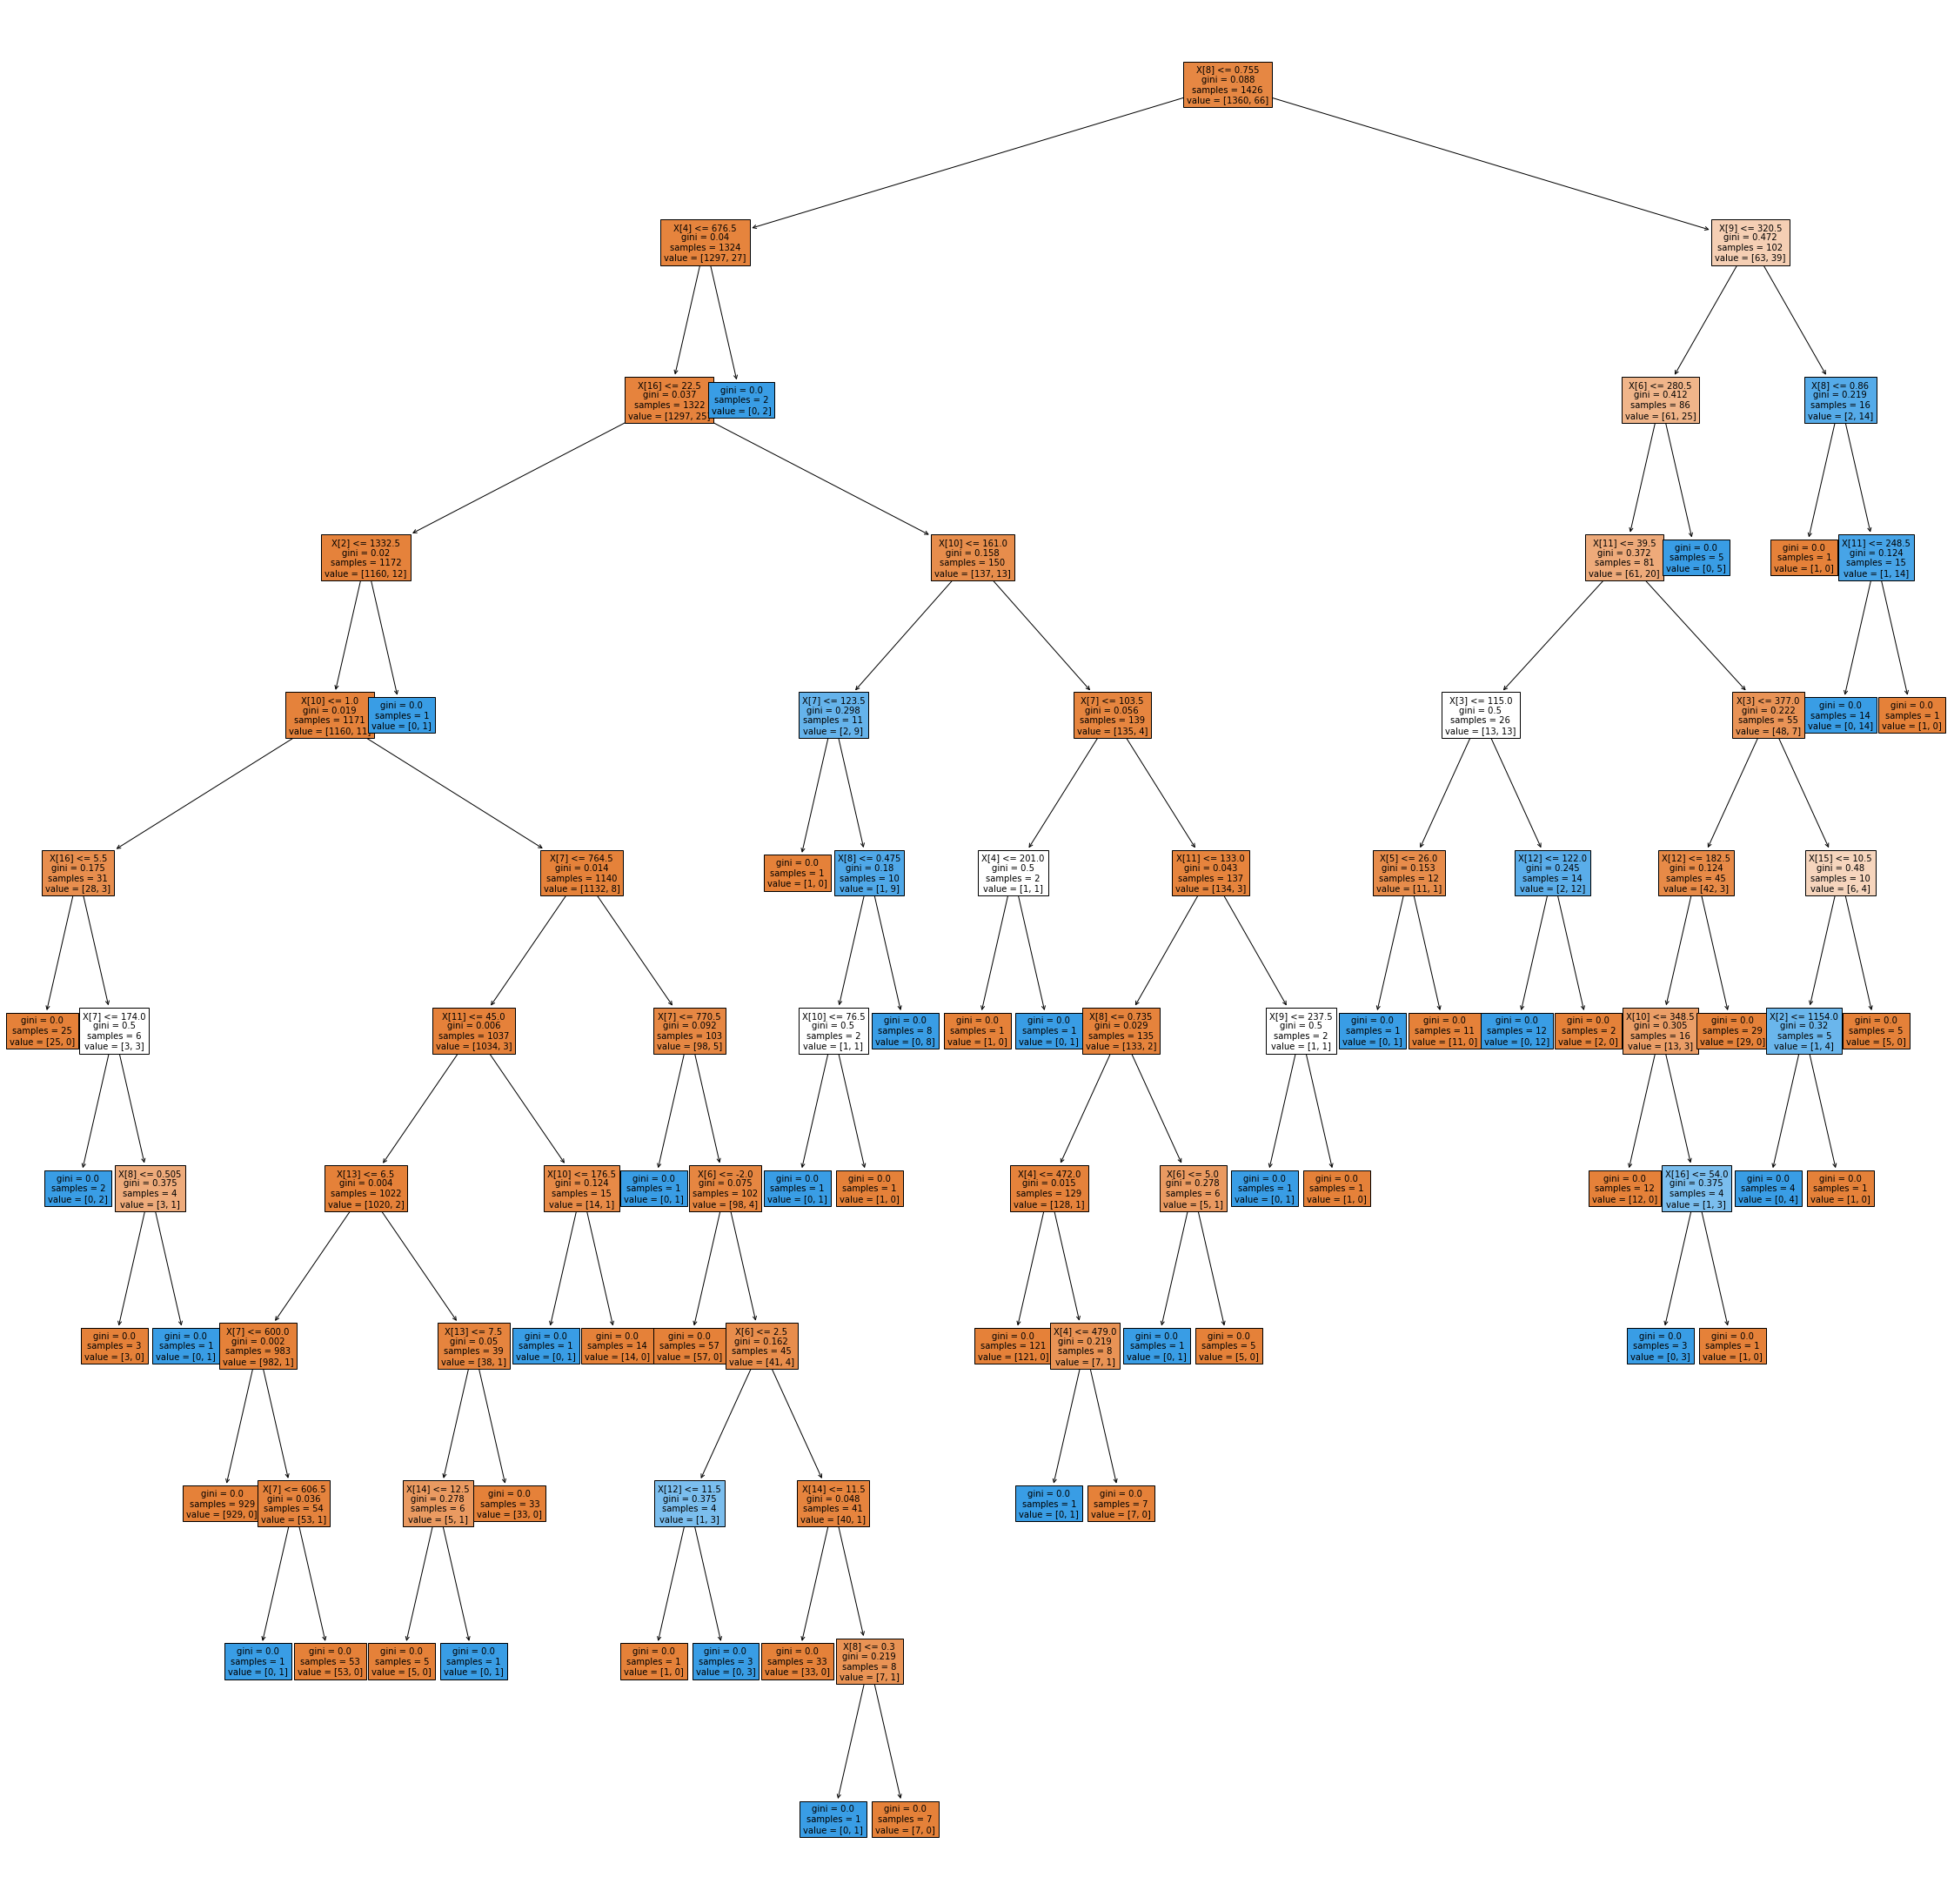

In [38]:
fig, ax = plt.subplots(figsize=(40, 40))
tree.plot_tree(model.fit(X_test, Y_test), filled=True, fontsize=10)
plt.show()